# Heart Attack: Who is at risk?

#### Introduction:

Heart attacks are one of the main causes of death in the world. Back in 2019, approximately **18 million** people died from Cardiovascular diseases, representing **32%** of global deaths for that year. Heart attacks and strokes represent over **85%** of those deaths. But what is a heart attack? During its ocurence, a lack of blood flow causes the tissue in the heart muscle to die. It occurs when the flow of blood to the heart is severely reduced or blocked. In other words, it is sudden, unexpected and usually fatal. The goal of this project is to predict if a person is at risk of having a heart attack.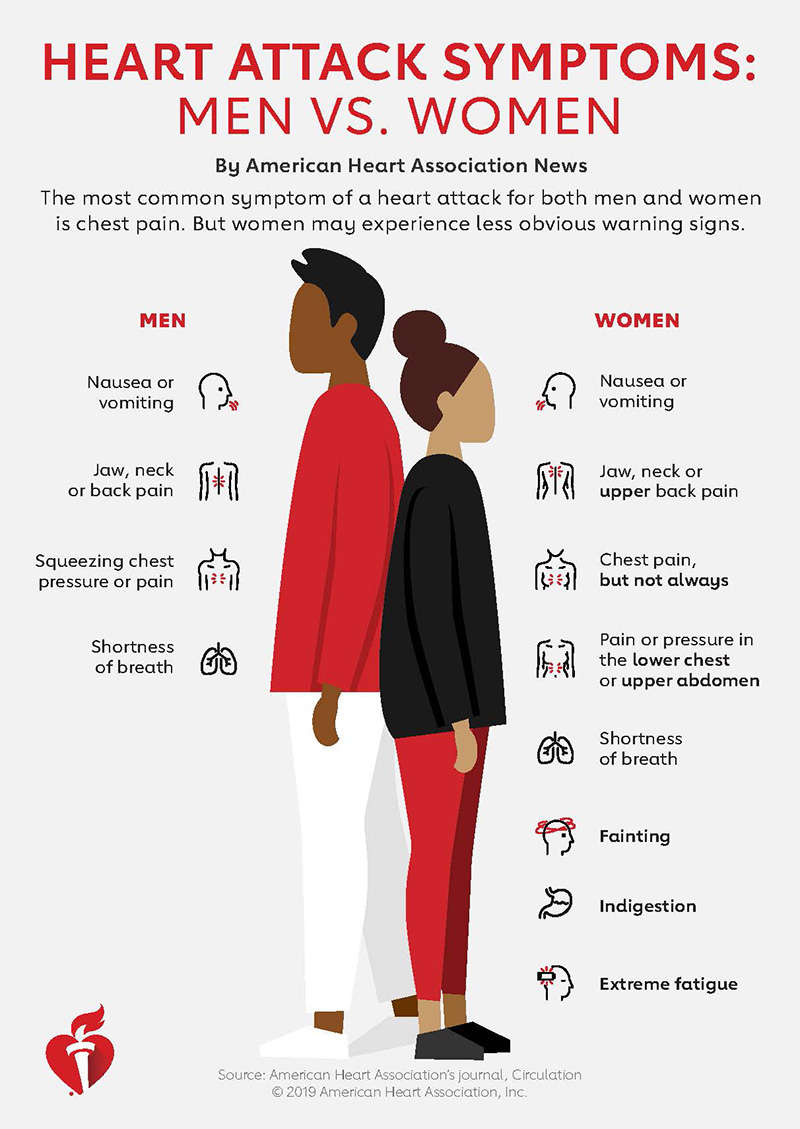

#### Our data:

The data we are working on today was taken from Kaggle. Click the following to access it [OUR DATA](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

In [1]:
#import all the necessary packages (this will be updated every step along the way)

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Loading our data

Our data is a CSV file 

In [2]:
data = pd.read_csv("/Users/raouz/Desktop/Capstone Project: Heart Attack Prediction/data/raw/heart.csv")

### Data wrangling

Now that our data is in our notebook, it's time to learn about it and clean it up.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Saving the columns names just in case we need them in the future
original_columns = data.columns
print(original_columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


In [6]:
data.shape

(303, 14)

Based on our data documentation we have the following:


1-age - age in years

2-sex - sex (1 = male; 0 = female)

3-cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4-trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5-chol - serum cholestoral in mg/dl

6-fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7-restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8-thalach - maximum heart rate achieved

9-exng - exercise induced angina (1 = yes; 0 = no)

10-oldpeak - ST depression induced by exercise relative to rest

11-slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12-ca - number of major vessels (0-3) colored by flourosopy

13-thal - Thalium Stress Test result 2 = normal; 1 = fixed defect; 3 = reversable defect

14-num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

##### Let's rename our columns to make it more readable and easier to understand

In [7]:
data.rename(columns ={'age':'Age','sex':'Sex',"caa":"MajorVessels",'trtbps':'RestBloodP','cp':'ChestPain','thalachh':'MaxHeartRate','restecg':'RestEcg'}, inplace =True)


In [8]:
data.head()

,Age,Sex,ChestPain,RestBloodP,chol,fbs,RestEcg,MaxHeartRate,exng,oldpeak,slp,MajorVessels,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Now let's learn more about the features values that we have.

In [9]:
#Lets get the number of occurences unique values for each feature
data.nunique()

Age              41
Sex               2
ChestPain         4
RestBloodP       49
chol            152
fbs               2
RestEcg           3
MaxHeartRate     91
exng              2
oldpeak          40
slp               3
MajorVessels      5
thall             4
output            2
dtype: int64

It looks like our data has both numeric and categorial variables. Lets look closely:

In [10]:
#Print out what are these unique values for each column
for col in data.columns:
    print(col)
    print(data[col].value_counts())

Age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: Age, dtype: int64
Sex
1    207
0     96
Name: Sex, dtype: int64
ChestPain
0    143
2     87
1     50
3     23
Name: ChestPain, dtype: int64
RestBloodP
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1


Therefore we can conclude that our numeric features are: Age, RestBloodP, chol, thalach, oldpeak and the rest are all categorial including our target!

While looking at our MajorVessels column, we noticed that the number 4 appears, even though it is not part of the allowed values, which vary from 0 to 3. This is definitely a value that refers to a missing value. Only 5 rows have a value 4 for MajorVessels, and since our dataset is not large, we can replace rather than delete these values.


In [11]:
data['MajorVessels'].unique()

array([0, 2, 1, 3, 4])

In [12]:
mode= data['MajorVessels'].mode().iloc[0]
type(mode)

numpy.int64

In [13]:
#replace all 4 with the mode, most frequent value.

data['MajorVessels'] = data['MajorVessels'].replace(4,mode)#0 in this case



In [14]:
data['MajorVessels'].unique()

array([0, 2, 1, 3])

In [15]:
data['MajorVessels'].value_counts()

0    180
1     65
2     38
3     20
Name: MajorVessels, dtype: int64

Same thing goes for the "thall" feature. The value 0 is actually a NaN value based on the documentation. Therefore we will replace it by 2, the most fequent value among the patients.

In [16]:
data['thall'].unique()

array([1, 2, 3, 0])

In [17]:
mode2= data['thall'].mode().iloc[0]
data['thall'] =data['thall'].replace(0,mode2)#0 in this case

In [18]:
data['thall'].unique()

array([1, 2, 3])

In [19]:
data['thall'].value_counts()

2    168
3    117
1     18
Name: thall, dtype: int64



Good! Now let's drop any duplicate rows, it there is any. The reason for that is that the chances of 2 people having the same exact data is rare, however, a data entry error is more common. Therefore, deleting these duplicate rows will help us build a more precise and unbiased model.


In [20]:
#Lets get the shape before
data.shape

(303, 14)

In [21]:
#Find out if there is any duplicate rows, if it returns True that means there are some
True in data.duplicated()

True

In [22]:
#Lets delete these rows and update our data
data = data.drop_duplicates()
data.shape

(302, 14)

#Only one row was a duplicate and now its gone.

### EDA (Exploratoty Data Analysis)

Let's look at our data again and split it into numeric and categorical subsets. 

In [23]:
data.head()

,Age,Sex,ChestPain,RestBloodP,chol,fbs,RestEcg,MaxHeartRate,exng,oldpeak,slp,MajorVessels,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
#Numerical Features 
Num_vals= data[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']]

Num_vals.head()

,Age,RestBloodP,chol,MaxHeartRate,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [25]:
#Categorical Features
Cat_vals= data[['Sex','ChestPain','fbs','RestEcg','exng','slp','MajorVessels','thall','output']]

Cat_vals.head()

,Sex,ChestPain,fbs,RestEcg,exng,slp,MajorVessels,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1


## Numerical Features
Let's explore our numerical features one by one then explore their connection with our dependent variable, 'Output'

In [26]:
Num_vals.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
RestBloodP,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
MaxHeartRate,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In the following graphs we will display the distributions of the numerical features. This 

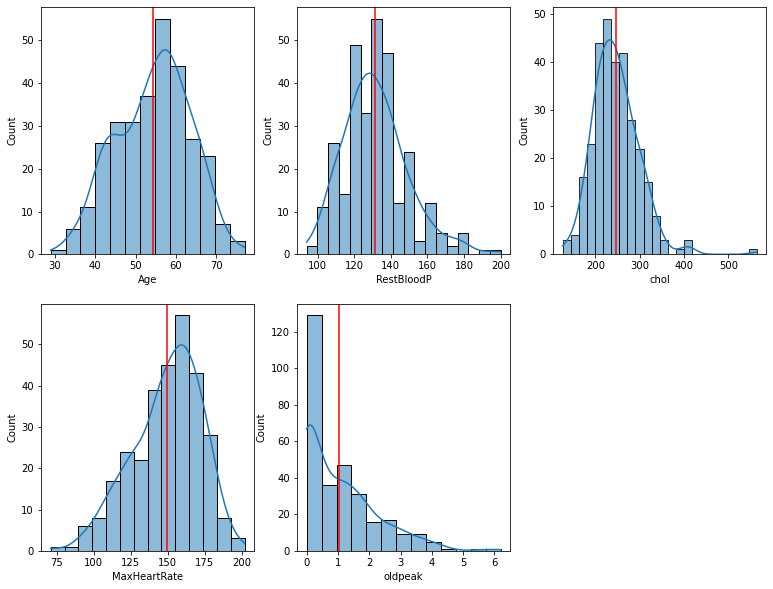

In [77]:
Num_vals= data[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']]
plt.figure(figsize = (13,10))

for row,col in enumerate(Num_vals):
    plt.subplot(2,3,row+1)
    sns.histplot(data[col],kde=True,stat='count')
    plt.axvline(x=data[col].mean(),color='red')

Our observations:

Age:
 
- The vast majority of patients are between 50 and 60.
- The mean seems to be close to the middle of the data, and it seems that there isn't any outliers. This indicate that our age variable might have a normal distribution.

Resting Blood Pressure:

- There is high density of patients between 115-120, 125-130, and 155-160 values.Therefore,the resting blood pressure of most patients is between 110 and 140.
- There is a small skew to the right, however, this data could be normally distributed,
- Values after 180 can be considered as outliers.
 
Chol:

- Cholesterol value in most patients is between 200-and 280. 
- Our distribution is slightly skewed to the right due to values that outlier, which if removed, would make our data normally distributed.
- Values after 380 can be considered as outliers.

Max Heart Rate:

- The maximum heart rate in most patients is between 145-and 170.
- Our data seems to be normally distributed, but there is a small left skew.
- The values before 80 can be considered outliers.

Old peak:
 
- Most of the value are between 0 and 1.5. Therefore, our data is clearly skewed to the right.
- The values after 2.5 can be considered outliers.

#### Target variable: Output
Seeing our numerical values in connection with our target feature will give us a better idea of how our features are distributed. Before that let's look at how our target feature 'output' is split. 



[[Text(0, 0, 'Low chances of attack(0)'),
  Text(0, 0, 'High chances of attack(1)')]]

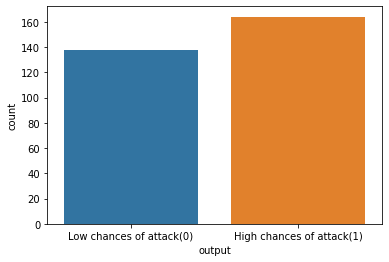

In [86]:
x=sns.countplot(x=data['output'])
x.set(xticklabels = (["Low chances of attack(0)","High chances of attack(1)"]))

Our data contains slightly more patients at risk than patients with low chances of having a heart attack. Now let's see how our target affects the numerical values distribution.
For that we will use **KDE PLOTS**.


--> These graphs will consist of 2 humps in different colors, each representing a different output value. The rule here is if the humps are separated and not overlapping, then there is a chance of correlation with the Target. If the humps overlap a lot, that means the feature is not well-correlated with the Target because the Target is equally as common on those values of the feature.

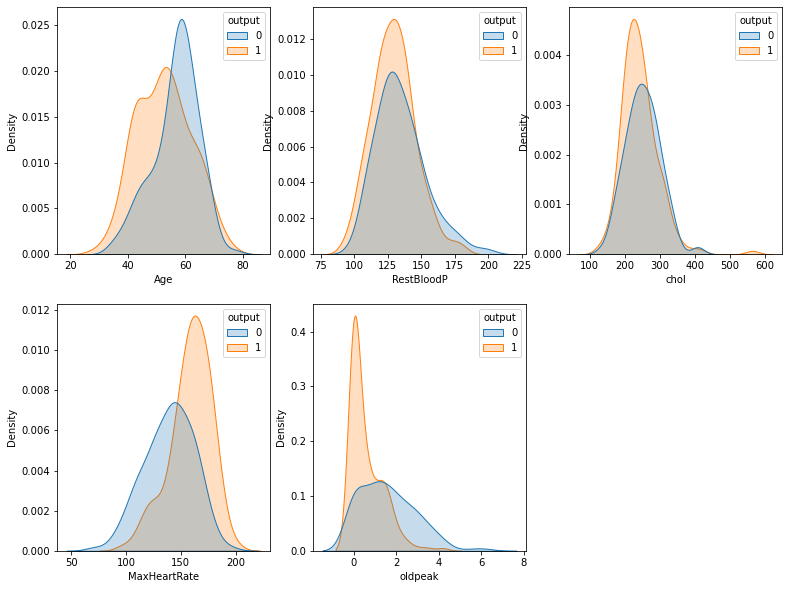

In [55]:
plt.figure(figsize = (13,10))
for row,col in enumerate(Num_vals):
    plt.subplot(2,3,row+1)
    sns.kdeplot(data=data,x=col,hue='output',fill=True)

Before we analyse these graphs, lets construct a correlation table for these values vs our target.

In [90]:
num_targ_corr= data[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak','output']]
num_targ_corr.corr().iloc[:, [-1]]

,output
Age,-0.221476
RestBloodP,-0.146269
chol,-0.081437
MaxHeartRate,0.419955
oldpeak,-0.429146
output,1.000000


Our observations:
- We tend to believe as we get older we have a higher chance of having a heart attack. However this graph shows the contrary. We notice how after 55 the is an increase in the blue graph, which refers to an increase in patient with low risk. The correlation with this variable is negative and little.
- The higher the max heart reach, the higher are the chances of having a heart attack. There is some correlation there based on the graph and also the value 0.4199, which shows a moderate correlation between the target and this feature.
- For the old peak, we can see that the patients with values between 0 and 1.5 have a higher chance of a heart attack. On top of that the graph are somewhat seperated, which indicates a correlation. The correlation value of -0.429 indicates a negative and moderate correlation.
- For cholesterol and resting blood pressure, it is clear that the graphs are overlapping throughout the distribution. Also their correlation coefficent is low, therefore for now we assume they have such a little correlation with our target value 

Finally, let's look at the outliers discusses before and where exactly they appear.

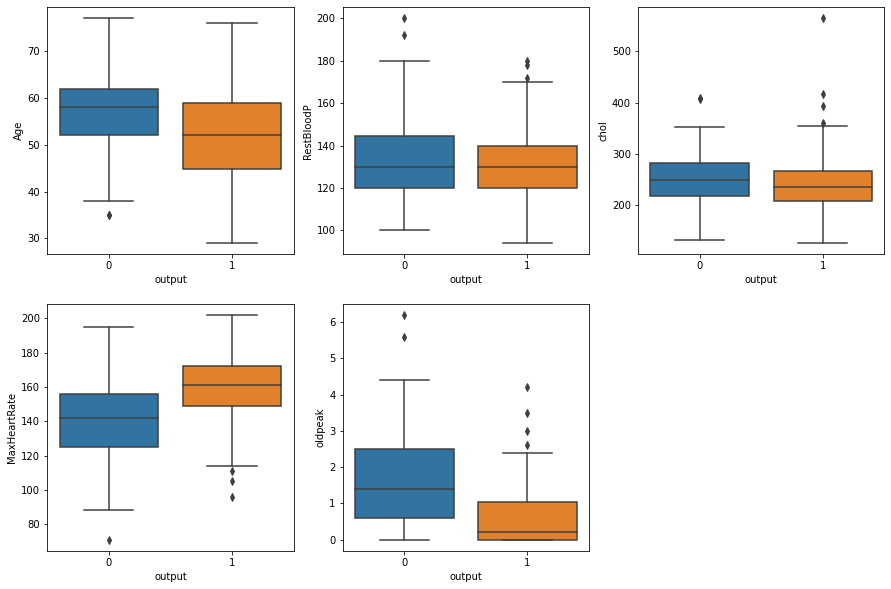

In [65]:
Num_vals= data[['Age', 'RestBloodP', 'chol', 'MaxHeartRate', 'oldpeak']]
plt.figure(figsize = (15,10))

for row,col in enumerate(Num_vals):
    plt.subplot(2,3,row+1)
    #sns.violinplot(data=Num_vals,y=Num_vals[col],x=data['output'])
    sns.boxplot(data=Num_vals,y=Num_vals[col],x=data['output'])

We clearly see the presence of multiple outliers in our data.

## Categorical Features

,Sex,ChestPain,fbs,RestEcg,exng,slp,MajorVessels,thall,output
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.682119,0.963576,0.149007,0.526490,0.327815,1.397351,0.665563,2.327815,0.543046
std,0.466426,1.032044,0.356686,0.526027,0.470196,0.616274,0.935142,0.583683,0.498970
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,3.000000,3.000000,1.000000


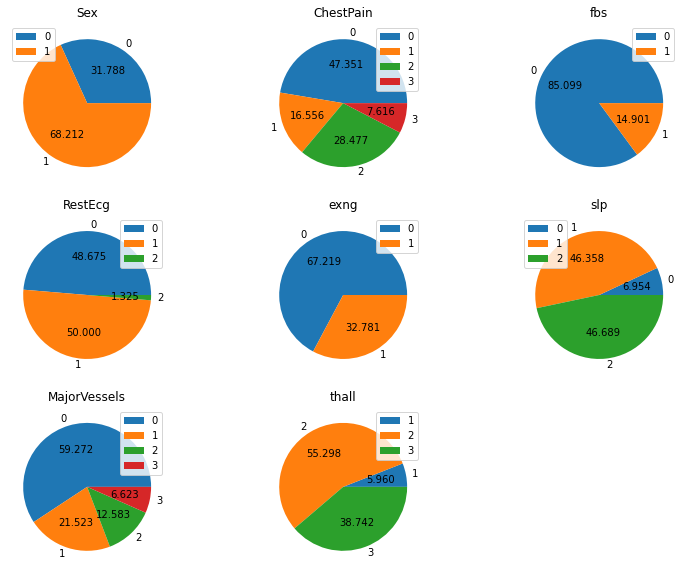

In [91]:
#We already discussed the target variable so for now we will remove it from our Categorical dataframe.
Cat_vals= data[['Sex','ChestPain','fbs','RestEcg','exng','slp','MajorVessels','thall']]
plt.figure(figsize=(13,10))

for row,col in enumerate(Cat_vals):
    plt.subplot(3,3,row+1)
    data.groupby(col).size().plot(kind='pie', autopct='%.3f',label='')
    plt.title(col)
    plt.legend()

**Our observations:**
The pie charts above show us how our data varies when it comes to the categorical features. These features might be really critical to our target so we will visualize how the output varies for each of the categories of these features. For that we will build multiple count plots in the form of bars. Blue represents the value 0, which reflects the patients with low chances, while the orange is for patients at risk of a heart attack.

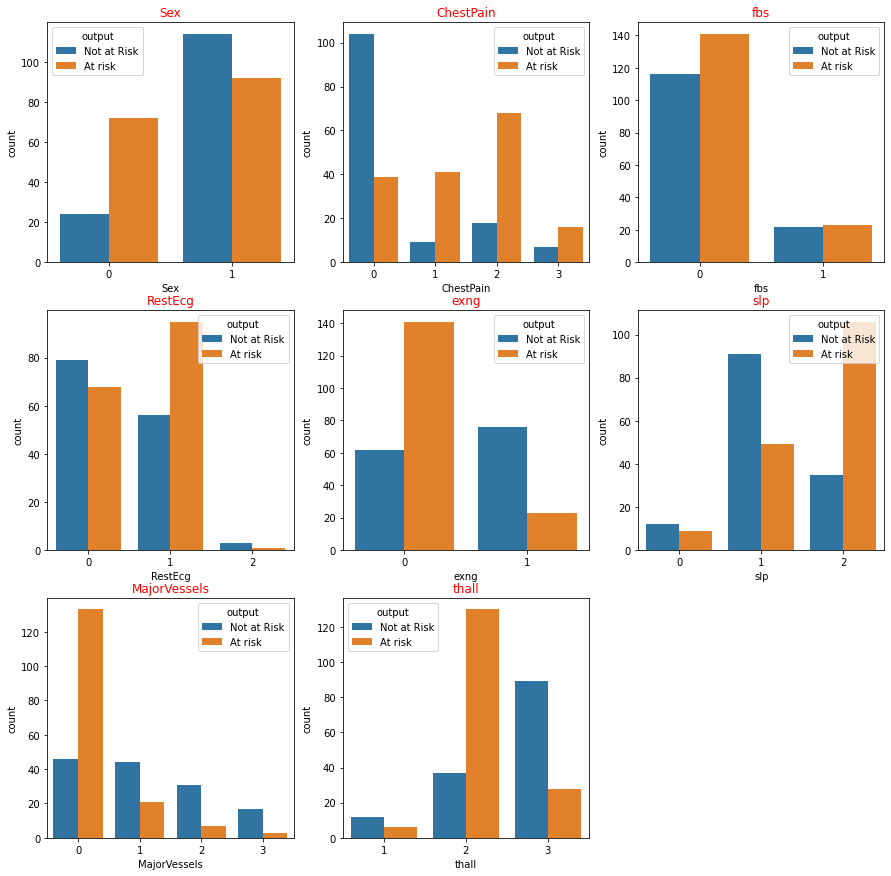

In [93]:
plt.figure(figsize=(15,15))
for row,col in enumerate(Cat_vals):
    plt.subplot(3,3,row+1)
    sns.countplot(data=data,x=col, hue='output')
    plt.title(col,color='red')
    plt.legend(title='output', labels=['Not at Risk', 'At risk'])

In [96]:
#Lets build a corr table for the categorical features:
Cat_target_corr= data[['Sex','ChestPain','fbs','RestEcg','exng','slp','MajorVessels','thall','output']]
Cat_target_corr.corr().iloc[:, [-1]]

,output
Sex,-0.283609
ChestPain,0.432080
fbs,-0.026826
RestEcg,0.134874
exng,-0.435601
slp,0.343940
MajorVessels,-0.463886
thall,-0.362313
output,1.000000


**Our observations:**

- Sex:
 - Women (value 0) are at higher risk for a heart attack than men. Our females patients at risk is more than double the amount at low risk. While men are the opposite, there are more men at low risk than high risk. With a value of -0.283 we can say that this feature is in a negative low correlation with the target.
 
- Chest Pain:
 - Having a value of 0 was not only the most common among our patients, but it is the one where the patients at low risk almost triple the ones at risk. While patients with other values (1,2,3) are more likely to be at risk of a heart attack as shows on the graph; the Orange bars are overpowering the blue ones. With a value of 0.432080 we can say that this feature is in a positive moderate to strong correlation with the target.

- FBS:
 - The majority of our patients had value 0, in other words, they had a fasting blood sugar less than 120 ml/dl. The risk of a heart attack is slightly higher for these people, while the patients with value 1 are still at risk, but their data is so small that we can't make a clear assumption about them. This also shows that the output doesn't make a difference in the two categories. With a value of -0.026826 we can say that this feature is in a negative very low correlation with the target.
 
- RestEcg:
 - Resting electrocardiographic results show that patients with a value of 1 are extremely at risk, as their amount doubles the patients not at risk. For values 0 and 2, those patients are more likley to be at low risk. With a value of 0.134874 we can say that this feature is in a positive low to moderate correlation with the target 

- Exng:
 - Exercise induced angina with value 0, which means abscence of pain are more likely to be at risk of a heart attack. This is surprising because it means that excersive related heart pain has nothing to do with the chances of having a heart attack. The bars for value 1, who are people with pain, have almost 4 times more chances of not having a heart attack than being at risk. With a value of -0.435601 we can say that this feature is in a negative moderate to high correlation with the target.

- Slope:
 - Patients with a slope value of 2 are in general at risk of having a heart attack. As the graph shows, the patients at risk is almost 3 times the number of patients not at risk. As for the other values 0 and 1, the patients are more likely not to be at risk, esepcially with a value of 1, their chances double. With a value of 0.343940 we can say that this feature is in a positive moderate to high correlation with the target.
 
- Major Vessels
 - The value 0 is what draws our attention in this feature. We can see that patients with 0 major vessels are 3 times more likely to be at risk than not to be. Patients with 1,2 or 3 majors vessels are clearly at less risk. This is also the feature with the highest correlation coefficent in our categorical features. With a value of -0.463886 we can say that this feature is in a negative moderate to high correlation with the target. 

- Thall:
 - For Thalium stress test results, patients with value 1 have almost 4 times more chances of being at risk rather than not. While patients with 0 or 2 are more likely to be at low risk. With a value of -0.362313 we can say that this feature is in a negative moderate correlation with the target. 

### Putting everything together:
After separating our into 2 subests, that consisted of Numerical Features and Categorical Features, we proceeded to analyse these numbers and their variability. We then proceeded to analyze these features when they come in touch with our target variable, 'output'. Many features stood out from the rest by having not only a higher correlation coefficent but also by being distributed differently depending on the output results. In order for us to have a more general idea of the correlation of our features and the target, we will now check the correlation between all our features.

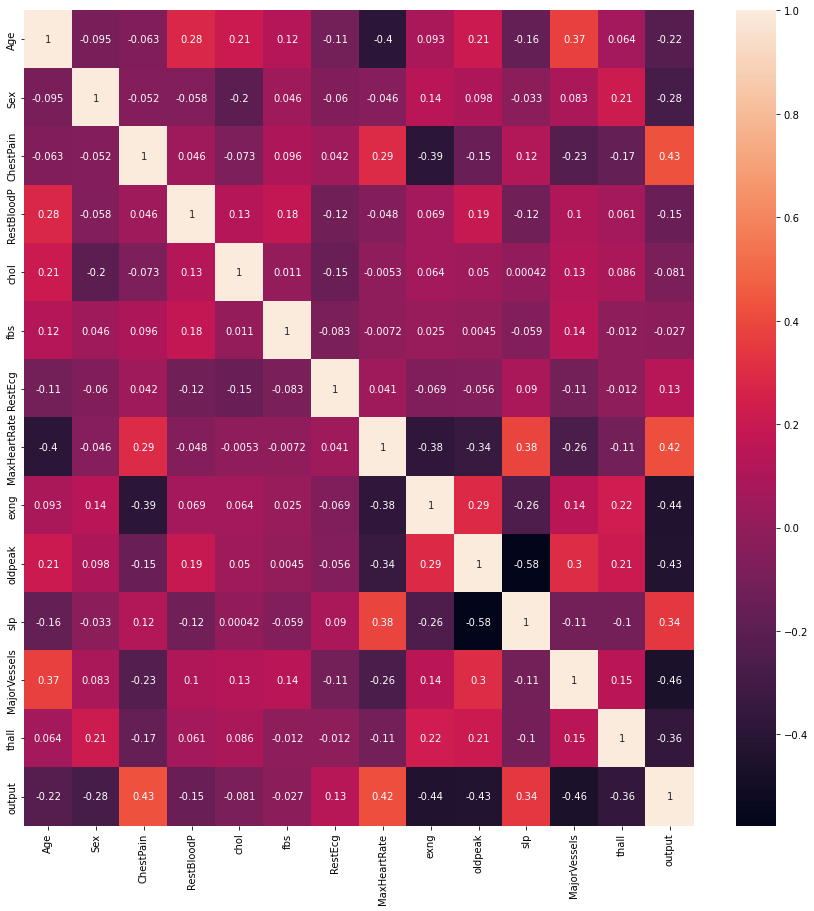

In [102]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)

In conclusion, this EDA phase taught us a lot about our data and what we should expect in the modeling phase. The features to keep in mind and consider as influencial are the ones with the highest correlation to our target. And based on the heat map above and our individual analysis of each feature in regards to the target, we should look closely at MajorVessels, slp, exng, oldpeak, Chestpain, MaxHeartRate and Thall. 